In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization.Interval2d import Interval2d
from interClusLib.visualization.Interval3d import Interval3d
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          1.281769         1.597315        75.111457        86.831509   
1         75.779045        86.918585        66.462020        74.337087   
2          0.562477        51.404082        62.242668        90.523457   
3         50.500943        99.493864        92.467109        93.371693   
4          6.359580        36.661632        56.821216        65.369070   
5         92.312446        92.440799        15.606838        44.622413   
6         29.016352        73.545384         4.656350        21.785799   
7         44.899308        71.900484        37.941133        44.675259   
8         72.318449        96.832998        42.632829        59.567786   
9          7.139546        23.421472        18.637063        52.266227   
10        37.083399        66.210267        28.561917        78.933

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.         0.         0.31117346 0.05502961 0.         0.11683474
  0.02080203 0.         0.         0.07438207 0.18340507 0.
  0.19503757 0.06616094 0.03122025 0.21303427 0.1135871  0.10766487
  0.         0.26614666 0.         0.12584347 0.07275124 0.18367489
  0.11952169 0.22198552 0.04341717 0.20175685 0.11235823 0.09065888]
 [0.         1.         0.09281998 0.17376509 0.23903287 0.
  0.01136197 0.12447342 0.29699394 0.         0.07258075 0.07370079
  0.         0.04062649 0.08577512 0.09344695 0.04052836 0.03607197
  0.12531755 0.04891899 0.07843737 0.34928028 0.18310527 0.01926456
  0.19497824 0.         0.06924379 0.06952675 0.26807459 0.01853866]
 [0.31117346 0.09281998 1.         0.13142196 0.22959146 0.19193749
  0.20818718 0.08971464 0.0476741  0.10674936 0.37534642 0.15732284
  0.49240969 0.28308994 0.20689929 0.53548725 0.38185829 0.09097325
  0.04843759 0.2864928  0.0119706  0.3185124  0.4281648  0.4425484
  0.5563839  0.27747213 0.32762161 0.27989349 0.16714781 0.3

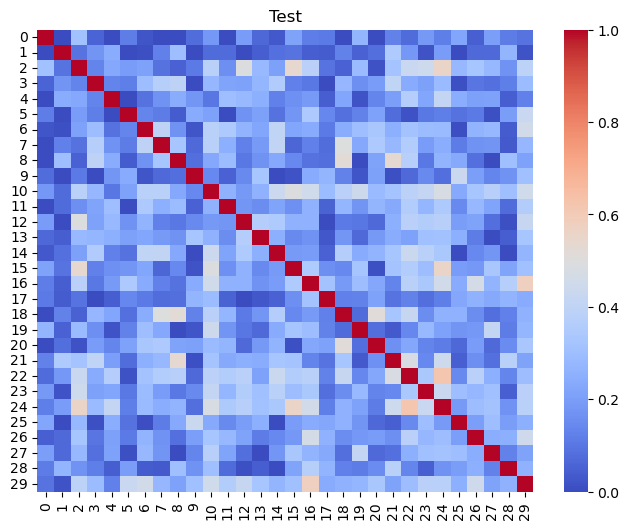

In [3]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [4]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[0 1 2 2 1 3 1 1 1 0 1 1 2 1 2 0 3 3 1 0 1 1 1 2 2 0 1 0 3 1]


<Figure size 1000x600 with 0 Axes>

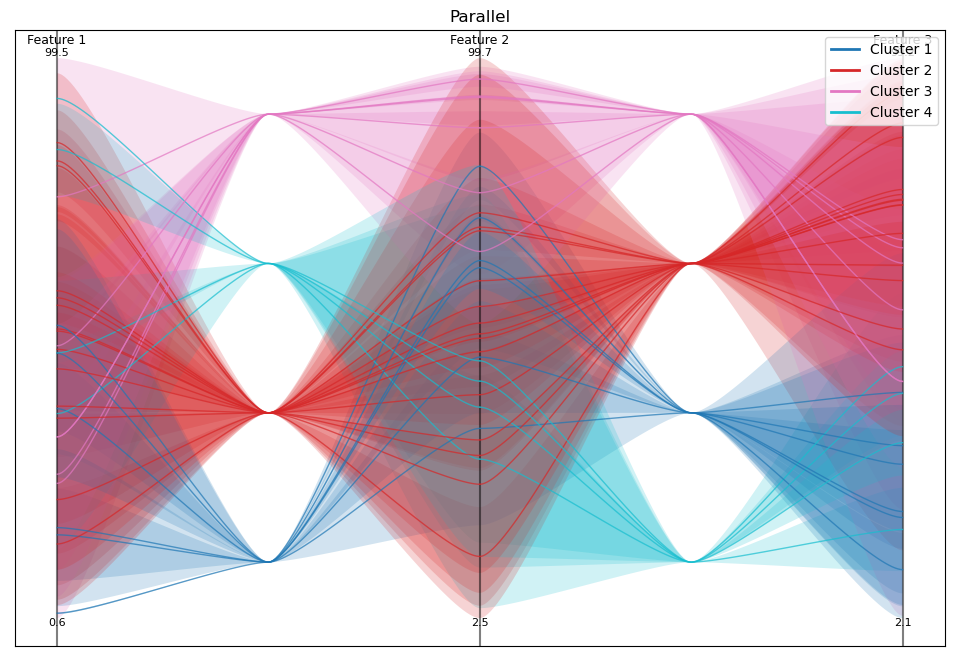

In [10]:
plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.labels_, beta = 1)
plt.title("Parallel")
plt.show()

In [6]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    Interval3d.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    Interval2d.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    Interval2d.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


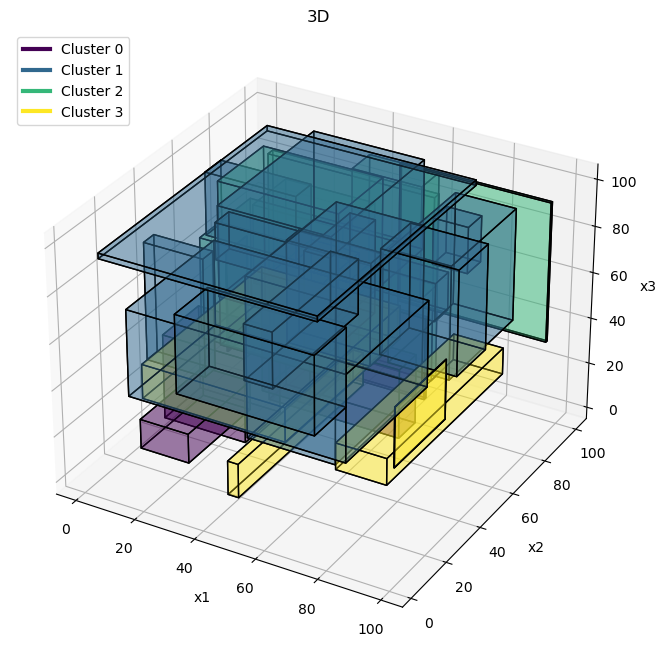

In [7]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          1.281769         1.597315        75.111457        86.831509   
1         75.779045        86.918585        66.462020        74.337087   
2          0.562477        51.404082        62.242668        90.523457   
3         50.500943        99.493864        92.467109        93.371693   
4          6.359580        36.661632        56.821216        65.369070   
5         92.312446        92.440799        15.606838        44.622413   
6         29.016352        73.545384         4.656350        21.785799   
7         44.899308        71.900484        37.941133        44.675259   
8         72.318449        96.832998        42.632829        59.567786   
9          7.139546        23.421472        18.637063        52.266227   
10        37.083399        66.210267        28.561917        78.933940   
11        11.955964        84.144572        52.895321        60.378918   
12         9.0

ValueError: Unsupported intervals shape: (30, 3, 2). Expected (n_samples, 1, 2) or similar.

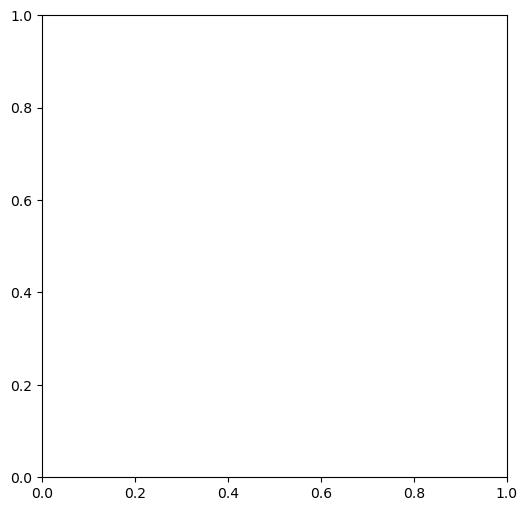

In [8]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)


model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0         37.642104        47.518800        87.975492        99.070772
1          6.140079        94.234274        10.885616        21.354939
2         28.380370        44.718896        46.601996        82.180924
3         90.525302        91.957251        19.278583        23.025270
4         56.695422        91.691875         1.293859        21.227392
5         56.871391        72.239912        30.342035        82.093461
6         16.176878        69.212786        15.967656        76.709316
7         52.407264        64.192542        87.604533        97.875313
8          1.845676        37.227472        36.046490        81.046227
9         21.869767        56.979685        43.415136        46.013033
10        59.667923        72.308174        74.728029        97.363108
11        20.397126        49.974187         5.115288        39.130665
12        87.310496        95.789061        43.708572

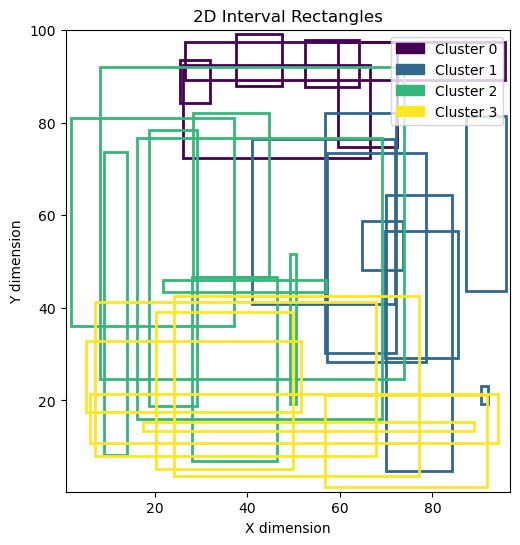

In [ ]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)